In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

cv09_bunkyB = cv2.imread("cv09_bunkyB.bmp", cv2.IMREAD_GRAYSCALE)
cv09_bunkyC = cv2.imread("cv09_bunkyC.bmp", cv2.IMREAD_GRAYSCALE)
cv09_rice = cv2.imread("cv09_rice.bmp", cv2.IMREAD_GRAYSCALE)

# def dilation(img, kernel):
#     # Create an empty output image
#     output = np.zeros_like(img)

#     # Pad the input image with zeros
#     img_padded = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)

#     # Loop over the pixels of the input image
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             # Compute the maximum pixel value under the kernel
#             max_val = -np.inf
#             for k in range(kernel.shape[0]):
#                 for l in range(kernel.shape[1]):
#                     if kernel[k, l] != 0:
#                         val = img_padded[i+k, j+l] + kernel[k, l]
#                         if val > max_val:
#                             max_val = val
#             output[i, j] = max_val
#     return output


def dilation(img, kernel=np.ones((3, 3), np.uint8)):
    """
    param img: input image
    param kernel: kernel
    return: dilation image
    """
    # Create an empty output image
    output = np.zeros_like(img)

    # Pad the input image with zeros
    img_padded = np.pad(img, ((1, 1), (1, 1)), mode="constant", constant_values=0)

    # Loop over the pixels of the input image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Compute the maximum pixel value under the kernel
            values = img_padded[i : i + kernel.shape[0], j : j + kernel.shape[1]]
            output[i, j] = np.max(values)
    return output


# def erosion(img, kernel):
#     # Create an empty output image
#     output = np.zeros_like(img)

#     # Pad the input image with zeros
#     img_padded = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)

#     # Loop over the pixels of the input image
#     for i in range(img.shape[0]):
#         for j in range(img.shape[1]):
#             # Compute the minimum pixel value under the kernel
#             min_val = np.inf
#             for k in range(kernel.shape[0]):
#                 for l in range(kernel.shape[1]):
#                     if kernel[k, l] != 0:
#                         val = img_padded[i+k, j+l] - kernel[k, l]
#                         if val < min_val:
#                             min_val = val
#             output[i, j] = min_val
#     return output


def erosion(img, kernel=np.ones((3, 3), np.uint8)):
    """
    param img: input imageD
    param kernel: kernel
    return: erosion image
    """
    # Create an empty output image
    output = np.zeros_like(img)

    # Pad the input image with zeros
    img_padded = np.pad(img, ((1, 1), (1, 1)), mode="constant", constant_values=0)

    # Loop over the pixels of the input image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Compute the minimum pixel value under the kernel
            values = img_padded[i : i + kernel.shape[0], j : j + kernel.shape[1]]
            output[i, j] = np.min(values)
    return output


def opening(img, kernel):
    """
    param img: input image
    """
    # first erosion, then dilation
    img_opening = erosion(img, kernel)
    img_opening = dilation(img_opening, kernel)
    return img_opening


def closing(img, kernel):
    """ """
    # first dilation, then erosion
    img_closing = dilation(img, kernel)
    img_closing = erosion(img_closing, kernel)
    return img_closing


def img_to_gray(img):
    """
    param img: input image
    return: gray image
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img


def top_hat(img, kernel, iter):
    """
    param img: input image
    """  
    return cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=iter)


def image_color_segmentation(img, threshold):
    """
    param img: input image

    """
    # extract the color channels
    img = img.astype(np.uint8)
    background = img

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if background[i, j] >= threshold:
                img[i, j] = 255
            else:
                img[i, j] = 0

    return img


class ColorSpace:
    def __init__(self):
        self.pixel_value = 0
        self.color_value = 0


def region_coloring(img):
    """
    region identification and coloring

    """
    # tmp_img = np.zeros_like(gray_img, dtype=ColorSpace)
    tmp_img = [[ColorSpace() for i in range(img.shape[1])] for j in range(img.shape[0])]
    tmp_img = np.array(tmp_img)

    for i in range(tmp_img.shape[0]):
        for j in range(tmp_img.shape[1]):
            if img[i, j] != 0:
                tmp_img[i, j].pixel_value = 1
                tmp_img[i, j].color_value = 0

    uniqe_color_iterator = 1
    iter = 0

    while True:
        flag_changed_color = False
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if i > 0 and j > 0 and i < img.shape[0] - 1 and j < img.shape[1] - 1:
                    if tmp_img[i, j].pixel_value == 1:
                        mask = np.array(
                            [
                                tmp_img[i - 1, j - 1],
                                tmp_img[i - 1, j],
                                tmp_img[i - 1, j + 1],
                                tmp_img[i, j - 1],
                                tmp_img[i, j + 1],
                                tmp_img[i + 1, j - 1],
                                tmp_img[i + 1, j],
                                tmp_img[i + 1, j + 1],
                            ],
                        )

                        # get non black pixels from mask
                        color = [
                            x.color_value
                            for x in mask
                            if x.pixel_value == 1 and x.color_value != 0
                        ]

                        # if there is no non black pixel in mask
                        if len(color) == 0 and tmp_img[i, j].pixel_value == 1:
                            tmp_img[i, j].color_value = uniqe_color_iterator
                            uniqe_color_iterator += 1
                            flag_changed_color = True
                        elif (
                            tmp_img[i, j].pixel_value == 1
                            and min(color) != tmp_img[i, j].color_value
                        ):
                            tmp_img[i, j].color_value = min(color)
                            flag_changed_color = True
        iter += 1
        if flag_changed_color == False or iter > 20:
            break

    final_img = np.zeros_like(img, dtype=np.float32)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if tmp_img[i, j].pixel_value == 1:
                color = tmp_img[i, j].color_value
                final_img[i, j] = color
    return final_img


def center_of_mass(img):
    centers = []
    for i in np.unique(img):
        mask = img == i
        y, x = np.where(mask)
        if i != 0:
            centers.append((np.mean(x), np.mean(y)))
    return centers

Text(0.5, 1.0, 'Uzavření')

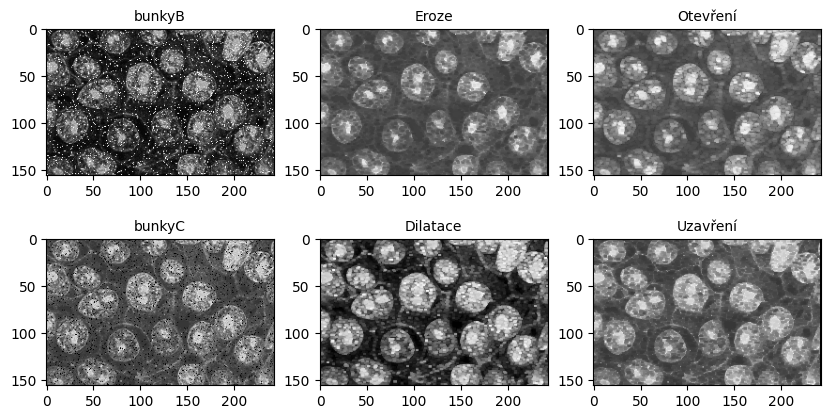

In [2]:
kernel = np.array([[0, 1, 0], [1, 1, 1]], np.uint8)
size_sub = 2

plt.figure(figsize=(10, 5))
plt.subplot(size_sub, 3, 1)
plt.imshow(cv09_bunkyB, cmap='gray')
plt.title('bunkyB', fontsize=10)

plt.subplot(size_sub, 3, 2)
plt.imshow(erosion(cv09_bunkyB, kernel), cmap='gray')
plt.title('Eroze', fontsize=10)

plt.subplot(size_sub, 3, 3)
plt.imshow(opening(cv09_bunkyB, kernel), cmap='gray')
plt.title('Otevření', fontsize=10)

plt.subplot(size_sub, 3, 4)
plt.imshow(cv09_bunkyC, cmap='gray')
plt.title('bunkyC', fontsize=10)

plt.subplot(size_sub, 3, 5)
plt.imshow(dilation(cv09_bunkyC, kernel), cmap='gray')
plt.title('Dilatace', fontsize=10)

plt.subplot(size_sub, 3, 6)
plt.imshow(closing(cv09_bunkyC, kernel), cmap='gray')
plt.title('Uzavření', fontsize=10)

Počet zrníček rýže segmentaci:  102
Počet zrníček rýže top hat:  99


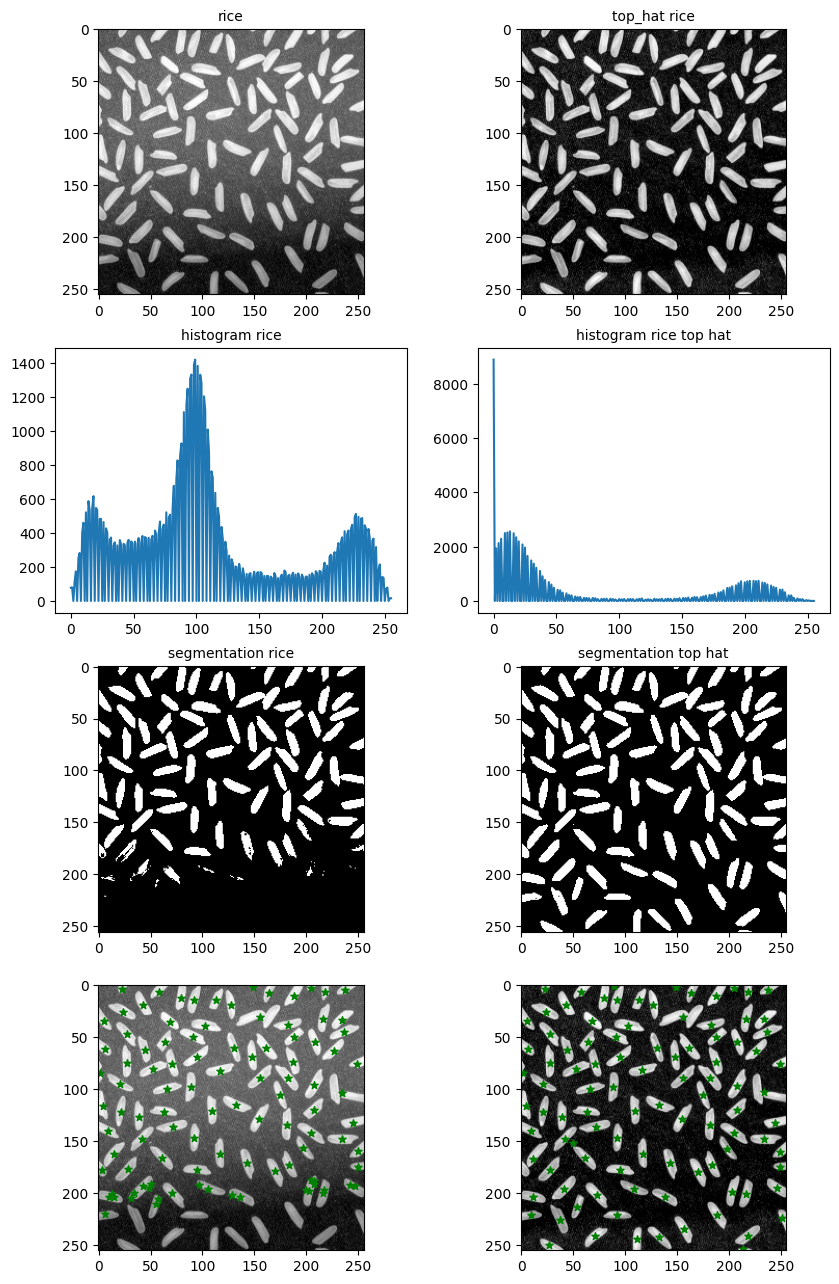

In [11]:
size_sub = 5
plt.figure(figsize=(10, 20))
plt.subplot(size_sub, 2, 1)
plt.imshow(cv09_rice, cmap="gray")
plt.title("rice", fontsize=10)

plt.subplot(size_sub, 2, 2)
rice_top_hat = top_hat(cv09_rice, kernel, 15)
plt.imshow(rice_top_hat, cmap="gray")
plt.title("top_hat rice", fontsize=10)

plt.subplot(size_sub, 2, 3)
plt.title("histogram rice", fontsize=10)
plt.plot(np.histogram(cv09_rice, bins=256)[0])

plt.subplot(size_sub, 2, 4)
plt.title("histogram rice top hat", fontsize=10)
plt.plot(np.histogram(rice_top_hat, bins=256)[0])

plt.subplot(size_sub, 2, 5)
plt.title("segmentation rice", fontsize=10)
rice_segmentation = image_color_segmentation(cv09_rice, 155)
plt.imshow(rice_segmentation, cmap="gray")

plt.subplot(size_sub, 2, 6)
plt.title("segmentation top hat", fontsize=10)
rice_top_hat_segmentation = image_color_segmentation(rice_top_hat, 60)
plt.imshow(rice_top_hat_segmentation, cmap="gray")

plt.subplot(size_sub, 2, 7)
plt.title("", fontsize=10)
plt.imshow(cv09_rice, cmap='gray')
centers = center_of_mass(region_coloring(rice_segmentation))
plt.scatter([x for x, y in centers], [y for x, y in centers], c="g", s=30, marker='*')
print("Počet zrníček rýže segmentaci: ", len(centers))

plt.subplot(size_sub, 2, 8)
plt.title("", fontsize=10)
plt.imshow(rice_top_hat, cmap='gray')
centers = center_of_mass(region_coloring(rice_top_hat_segmentation))
plt.scatter([x for x, y in centers], [y for x, y in centers], c="g", s=30, marker='*')
print("Počet zrníček rýže top hat: ", len(centers))
